# Machine Learning and Statistics Tasks

by Clare Tubridy

***

In [25]:
# Imports for all the tasks.
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Task 1

> Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such
as `math`. In this task,1 you should write a function `sqrt(x)` to 
approximate the square root of a floating point number x without
using the power operator or a package.

> Rather, you should use the Newton’s method. Start with an
initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$
is less than some
threshold, say 0.01

$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$


In [2]:
def sqrt(x):
    # Initial guee for the sqaure root.
    z = x / 4.0

    # Loop until it is accurate enough.
    for i in range(100):
        # Newtons method for a better approx. 
        z = z - (((z * z) - x)/(2 * z))

    # z should now be a good approximation for square root.
    return z

In [3]:
# Test the function above.
sqrt(3)

1.7320508075688774

In [4]:
# Check pythons value for sqaure root.
3 ** 0.5

1.7320508075688772

### Notes
***
1. The calculation $z^2 - x$ is exactly zero when $z$ is the square root of $x$. It is greater than zero when $z$ is too big and less than zero when $z$ is too small. Thus $ (z^2 - x)^2 $ is a good candidate for a cost function.
2. The derivative of the numerator $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question. 
***

## Task 2
>  Consider the below contingency table based on a survey asking
respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use scipy.stats to perform
a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this
instance.

In [5]:
# Create the contingency table as a 2D NumPy array.
observed = np.array([[43, 57], [56, 45]])

In [6]:
# Perform the chi-sqaured test.
chi2, p, dof, expected = chi2_contingency(observed)

In [7]:
# Output results.
print("Chi-squared statistics: ", chi2)
print("Degrees of Freedom: ", dof)
print("P-value: ", p)
print("Expected frequencies table: ")
print(expected)

Chi-squared statistics:  2.6359100836554257
Degrees of Freedom:  1
P-value:  0.10447218120907394
Expected frequencies table: 
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


### Notes
***
1. If drink choice (Tea or Coffee) **does** affect biscuit choice (Plain or chocolate biscuits), it is said they are dependent.
2. **p < 0.05** is the usual test for dependence. 
3. In this case, **p** is greater than 0.05, therefore the variables are independent. 
4. In other words, drink preferences do **not** affect biscuit preferences.
5. This type of test only works for categorical data.

#### *Chi-Sqaure Formula*
This is the [forumla](https://www.scribbr.com/statistics/chi-square-tests/) for Chi- Sqaure:

$$ X^2 = \Sigma \frac{(O - E)^2}{E}$$

Where:
- $X^2$ is the chi-sqaure test statistic.
- $\Sigma$ is the summation operator.
- O is the observed frequency.
- E  is the expected frequency.

The larger the difference between the observations and the expectations $(O - E)$, the bigger the chi-sqaure will be.
***

## Task 3
>Perform a t-test on the famous penguins data set to investigate
whether there is evidence of a significant difference in the body
mass of male and female gentoo penguins.

In [8]:
# Load the penguins dataset from seaborn.
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# Filter the dataset for Gentoo penguins only.
gentoo_penguins = penguins[penguins["species"] == "Gentoo"]

In [10]:
# Seperate into male and female groups.
male_penguins = gentoo_penguins[gentoo_penguins["sex"] == "Male"]["body_mass_g"]
female_penguins = gentoo_penguins[gentoo_penguins["sex"] == "Female"]["body_mass_g"]

In [11]:
# Perform a t-test
t_stat, p_value = stats.ttest_ind(male_penguins, female_penguins)

In [12]:
# Output the results
print("T-statistic: ", t_stat)
print("p_value: ", p_value)

T-statistic:  14.721676481405709
p_value:  2.133687602018886e-28


### Notes 
***
1. The t-statistic measures the difference between the means of the two groups (male and female gentoo penguins) relative to the variabililty within each group. A larger value of the t-statistic indicates a greater difference. 
2. The p-value is the probability of observing a t-statisitc as extreme as the one computed from the sample data, assuming the null hypothesis is true. A very small p-value (in this case, close to zero) suggests that the observed difference in the body mass between male and female gentoo penguin is unlikely to be due to random chance.
3. The null hypothesis is rejected given the small p-value computed above. There is a significant difference in body mass between the two groups.
4. The null hypothesis in a t-test typically states that there is no significant difference between the groups being compared:

$$H_0 : \mu _{male} = \mu _{female}$$

Where:
- $\mu _{male}$ is the population mean body mass (g) of male gentoo penguins.
- $\mu _{female}$ is the population mean body mass (g) of female gentoo penguins.
***

## Task 4
>Using the famous iris data set, suggest whether the setosa class
is easily separable from the other two classes. Provide evidence
for your answer

In [13]:
# Load Iris dataset.
iris = load_iris()
x = iris.data
y = iris.target

In [14]:
# Creating a binary classification task: Setosa vs. Others
y_setosa = (y == 0).astype(int)

In [15]:
# Split the dataset into training and testing sets.
# 20% of data used for testing.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y_setosa, test_size=0.2)

In [16]:
# Train logistic regression model.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [18]:
# Evaluate the accuracy of the model.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### Notes 
***
- The accuracy value achieved above means perfect accuracy on the test set. The accuracy is the measure of how many predictions were correct out of the total number of predictions. 

- In this case, 1.0 (or 100%) indicates that every prediction made by the model on the test set was correct. There were no misclassifcations. 

- While it seems desirable to achieve perfect accuracy, it is important to exercise caution. Perfect accuracy can indicate overfitting, especially if the model has been trained on a small dataset.   

- Overfitting occurs when a model learns the training data too well, capturing noise or random fluctuations that do not generalize to new, unseen data. 

- One way to overcome ths is to remove the *random_state* value. This value ensures reproducibility. If a seed is not specified, the split will be different each time the code is run. 

- The conducted tests have demonstrated that the Setosa species is easily separable from the other species based on the given features.
***

## Task 5
> Perform Principal Component Analysis on the iris data set,
reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

In [19]:
# Standardize the features.
X_standardized = StandardScaler().fit_transform(x)


In [21]:
# Apply PCA with 2 components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

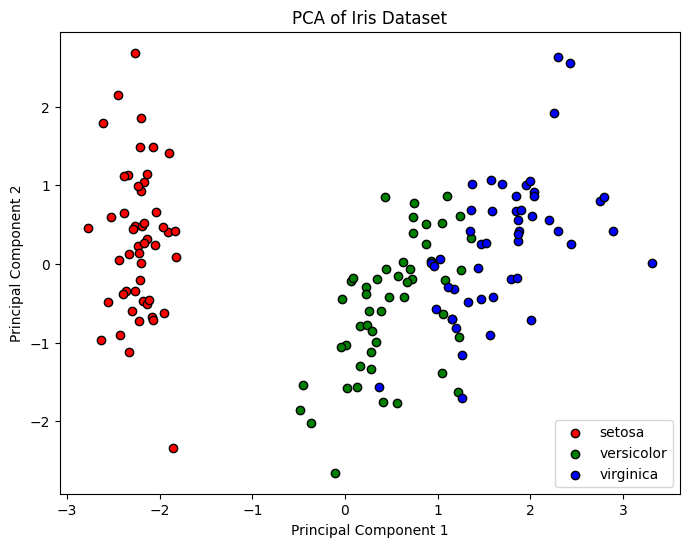

In [29]:
# Plot the results
plt.figure(figsize=(8, 6))
for i, c in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=iris.target_names[i], edgecolors='k')

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

***
## End